# Session 16 Pandas

## What is Pandas?
Pandas is a *fast, powerful, flexible and easy to use open source data analysis and manipulation tool*, built on top of the Python Programming Language.

We can import Pandas into code as follows:
```python
import pandas as pd
```
It is also advised to import numpy along with pandas, as a lot of numpy operations are used with pandas in real world scenarios.

Reference link:
https://pandas.pydata.org/about/index.html

## Pandas Objects
There are primarily two important object in Pandas, **DataFrames** and **Series**.

### Panda Series
A Panda Series is like a **column** in a **table**. It is a **1-D Array** olding data of *heterogeneous types*.

Additionally, each column of a Dataframe can be called as a Series. In Pandas, when you access a column of a DataFrame, it is returned as a Series. A Series is essentially a single column of a DataFrame but with additional properties and methods specific to it.

## Series from Lists
The code cells below demonstrate how Pandas Series can be generated from Lists.

In [2]:
# Series from lists
import pandas as pd

country = ["USA", "Canada", "Mexico", "India"]
pd.Series(country)

0       USA
1    Canada
2    Mexico
3     India
dtype: object

In [7]:
# An integer series
runs = [13, 24, 56, 78, 100]

runs_series = pd.Series(runs)
runs_series

0     13
1     24
2     56
3     78
4    100
dtype: int64

In [3]:
# In the previous example, the index is automatically generated. You can also specify your own index.
# An integer series with custom index
runs = [13, 24, 56, 78, 100]
marks = [60, 50, 40, 70, 80]
subjects = ['maths', 'english', 'science', 'history', 'geography']
pd.Series(marks, index=subjects)

maths        60
english      50
science      40
history      70
geography    80
dtype: int64

In [4]:
# A name can also be associated with a series
# Setting a name
marks = pd.Series(marks, index = subjects, name = "Marks of stud X")
print(marks)

maths        60
english      50
science      40
history      70
geography    80
Name: Marks of stud X, dtype: int64


## Series from Dictionary
In the below code cell is the demonstration of generating Pandas Series from a Python Dictionary.

In [5]:
marks = {
    'maths': 67,
    'english': 50,
    'science': 40,
    'history': 70,
    'geography': 80
}

marks_series = pd.Series(marks, name = "Marks of Stud X")
print(marks_series)

maths        67
english      50
science      40
history      70
geography    80
Name: Marks of Stud X, dtype: int64


## Series Attributes
Here, are all the attributes defined for the class Series, i.e. for the Objects of Series.

In [8]:
# size
# returns the count of total number of data items in the Series
print(marks_series.size)

# dtype
# returns the data type of the items stored within the series
print(marks_series.dtype)

# name
# returns the name defined for the series
print(marks_series.name)

# is_unique
# returns True if all the values in Series are unique, and False if not so
print(marks_series.is_unique)

# index
# returns the indices used in the series
print(marks_series.index)
print(runs_series.index)
# moreover, we can see that when consecutive values are used for indexing, they are generated by a Range function
print(type(runs_series.index))

# values
# returns all the values of the series, in a Numpy ndArray
print(marks_series.values)
print(type(marks_series.values))

5
int64
Marks of Stud X
True
Index(['maths', 'english', 'science', 'history', 'geography'], dtype='object')
RangeIndex(start=0, stop=5, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>
[67 50 40 70 80]
<class 'numpy.ndarray'>


## Series using read_csv
This method is used to **read** the **comma seperated files**, often coming up from real world data.

In [13]:
subs = pd.read_csv('subs.csv')
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


However, the above format is not that of a Series, but is rather a DataFrame. This can be verified by checking the `type()` of subs, and it will return as `pandas.core.frame.DataFrame`. 

To import the data as a Series object, we must consider the following additional method, that is '`squeeze()`'.

## Reading 1 column Dataset as a Series

In [157]:
# 1 column Dataset as Series
subs = pd.read_csv('subs.csv')
subs = subs.squeeze()
print(subs.squeeze(), type(subs.squeeze()))

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64 <class 'pandas.core.series.Series'>


In [122]:
# 2 column Dataset as Series
kohli_runs = pd.read_csv('kohli_ipl.csv', index_col='match_no')
kohli_runs = kohli_runs.squeeze()

In [10]:
# another 2 column Dataset as Series
bollywood = pd.read_csv('bollywood.csv', index_col='movie')
bollywood = bollywood.squeeze()
print(type(bollywood))
bollywood.head()

<class 'pandas.core.series.Series'>


movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
Name: lead, dtype: object

## Series Methods

### Head and Tail
`head()` and `tail()` are used to fetch a few of the **top** and **bottom most** values from the Dataset. This is usually done to get a *hint* of how the dataset looks like on the top and at the bottom.

By default `head()` and `tail()` displays the top 4 rows, but this can be changed by providing parameters.

In [80]:
subs.head()

,Subscribers gained
0,48
1,57
2,40
3,43
4,44


In [81]:
kohli_runs.head(3)

,runs
match_no,
1,1
2,23
3,13


In [82]:
bollywood.tail()

movie
Hum Tumhare Hain Sanam      Shah Rukh Khan
Aankhen (2002 film)       Amitabh Bachchan
Saathiya (film)               Vivek Oberoi
Company (film)                  Ajay Devgn
Awara Paagal Deewana          Akshay Kumar
Name: lead, dtype: object

### Sample
`sample()` selects and displays one of the rows at random from the dataset. Also, number of rows can be adjusted via parameters.

`sample()` is usually used to avoid any sort of positional bias that could be residing in the data.

In [83]:
bollywood.sample()

movie
Hope Aur Hum    Naseeruddin Shah
Name: lead, dtype: object

In [84]:
bollywood.sample(4)

movie
Ghost (2019 film)     Sanaya Irani
Yakeen (2005 film)    Arjun Rampal
Gippi                     Riya Vij
D-Day (2013 film)     Rishi Kapoor
Name: lead, dtype: object

### Value counts
`value_counts()` returns the number of times all the values are occuring throughout the dataset, i.e. the **frequency count** of all the values in the Dataset.

In [85]:
bollywood.value_counts()

lead
Akshay Kumar          48
Amitabh Bachchan      45
Ajay Devgn            38
Salman Khan           31
Sanjay Dutt           26
                      ..
Talha Arshad Reshi     1
Garima Agarwal         1
Rasika Agashe          1
Zaheer Iqbal           1
Deepika Amin           1
Name: count, Length: 566, dtype: int64

### Sort values
`sort_values()` sorts the rows of a Dataset on the basis of the column provided using the **parameter** `by`. Moreover, the sorting can either be in the **Ascending Order** or the **Descending Order** by customizing the `ascending` parameter as either `True` or `False`.

In [86]:
kohli_runs.sort_values(by='runs', ascending=False)

,runs
match_no,
128,113
126,109
123,108
120,100
164,100
...,...
93,0
130,0
206,0


This can be useful in the scenarios such as displaying the row with a highest value of a column, etc. as follows.

In [87]:
kohli_runs.sort_values(by='runs', ascending=False).head(1).values[0]

array([113])

The above *strategy* of code in Python is also known as **Chaining or Methods**. This refers to the case where the output of a function is used as an input of another function, in order to finally get the desired output.

Additionally, an `inplace` parameter can be used to introduce the displayed output as permanent changes in the imported Series. Though, the origin file of the dataset still stays unchanged. The `inplace` is introduced and describe later when needed.

### Sort index
`sort_index()` is another method like the `sort_values()` method, except that this sorts the rows in the order of their index.

In [88]:
bollywood.sort_index()

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

In case of a series occuring in a dataframe, we will have to specify the column that has to be used for sorting, using the `by` parameter as shown below.

In [11]:
bollywood.sort_values()

movie
Qaidi Band                            Aadar Jain
Roar: Tigers of the Sundarbans      Aadil Chahal
Lipstick Under My Burkha            Aahana Kumra
Raat Gayi Baat Gayi?                Aamir Bashir
Talaash: The Answer Lies Within       Aamir Khan
                                        ...     
Dil Toh Deewana Hai                  Zeenat Aman
Sallu Ki Shaadi                      Zeenat Aman
Strings of Passion                   Zeenat Aman
Dunno Y... Na Jaane Kyon             Zeenat Aman
Taj Mahal: An Eternal Love Story     Zulfi Sayed
Name: lead, Length: 1500, dtype: object

## Series Mathematical Methods
Here we discuss some of the mathematical methods that are applicable and are often used upon series.

### Count
Counts the total number of items within a Series. The point to note is that `count()` does not consider the missing values of the series.

In [ ]:
# count
kohli_runs.count()

runs    215
dtype: int64

### Sum, Product
`sum()` and `product()` are two distinct methods to perform the mathematical operation **sum** or **product** of the values of the column.

`prod()` can also be used in the place of `product()`, as they do the same thing, but have different names.

In [ ]:
print(subs.sum())
print(subs.product())
print(subs.prod())

Subscribers gained    49510
dtype: int64
Subscribers gained    0
dtype: int64
Subscribers gained    0
dtype: int64


### Statistical Methods
We have a lot of **statistical methods** available. Some of the commonly used and basic statistical methods are that are available in Pandas are: **mean**, **median**, **mode**, **std**, **var**.

In [ ]:
# mean, median, mode, std, var
print(f"mean: {subs.mean()}")
print(f"median: {kohli_runs.median()}")
print(f"mode: {bollywood.mode()}")
print(f"std dev: {subs.std()}")
print(f"var: {kohli_runs.var()}")

mean: Subscribers gained    135.643836
dtype: float64
median: runs    24.0
dtype: float64
mode:            lead
0  Akshay Kumar
std dev: Subscribers gained    62.675023
dtype: float64
var: runs    688.002478
dtype: float64


### Min/Max
`min()` and `max()` are used to fetch the **minimum** or **maximum** values of the Series.

In [ ]:
print(subs.min())
print(subs.max())

Subscribers gained    33
dtype: int64
Subscribers gained    396
dtype: int64


### Describe
Desrcibes some of the most important characteristics of the dataset or series. These details are as shown in the following code cell:

In [ ]:
kohli_runs.describe()

,runs
count,215.000000
mean,30.855814
std,26.229801
min,0.000000
25%,9.000000
50%,24.000000
75%,48.000000
max,113.000000


## Series Indexing
This has been a common strategy of selecting specific elements from **Python Lists** based on their **indices**. This can also be done on Series using Pandas.

In [ ]:
x = pd.Series([13, 24, 35, 46, 56, 67, 78])
x[3]

np.int64(46)

However, **negative indexing** in Pandas act in a very *different* way.

In Pandas, whether **negative indexing** works depends on **how you're accessing data** and **what type of index your Series or DataFrame has**. The behavior varies depending on whether you're using **positional indexing** or **label-based indexing**. Here's the key distinction:

---

### 🔑 1. **Negative Indexing in Python Lists vs Pandas**

* In standard Python lists or NumPy arrays: `arr[-1]` returns the **last element**.
* In Pandas: it depends on **what index your Series or DataFrame uses**.

---

### 🧠 Two Main Indexing Styles in Pandas:

| Method        | What it means   | Supports negative indexing (like Python lists)?        |
| ------------- | --------------- | ------------------------------------------------------ |
| `.iloc[]`     | **Positional**  | ✅ Yes — `-1` means the last row                        |
| `.loc[]`      | **Label-based** | 🚫 No — `-1` is treated as a label, not a position     |
| Direct access | `series[-1]`    | Depends — if `-1` is a **label**, it's used as a label |

---

### 🧪 Example

```python
import pandas as pd

# Example 1: Default integer index
s1 = pd.Series([10, 20, 30])
print(s1[-1])      # ❌ KeyError: -1 (because there's no label -1)
print(s1.iloc[-1]) # ✅ 30

# Example 2: Custom index with negative labels
s2 = pd.Series([100, 200, 300], index=[-1, -2, -3])
print(s2[-1])      # ✅ 100 (label -1 exists)
print(s2.iloc[-1]) # ✅ 300 (last element)

# Example 3: Custom index with strings
s3 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
print(s3[-1])      # ❌ KeyError: -1 (because label -1 doesn't exist)
print(s3.iloc[-1]) # ✅ 3
```

---

### ✅ Best Practice

* Use `.iloc[]` for **position-based indexing**.
* Use `.loc[]` for **label-based indexing**.
* Avoid relying on direct negative indexing (`series[-1]`) unless you're **sure of the index labels**.

---

### Summary

Negative indexing **doesn't always work** because:

* It depends on **how you're indexing** (by label or by position).
* Pandas may treat `-1` as a **label**, not as a position.
* Use `.iloc[-1]` when you want the last element by position, regardless of index labels.

### Slicing
Slicing is also permitted upon Pandas Series.

In [ ]:
kohli_runs[2:16]

,runs
match_no,
3,13
4,12
5,1
6,9
7,34
8,0
9,21
10,3
11,10


In [ ]:
# negative slicing is supported
kohli_runs[-5:]

,runs
match_no,
211,0
212,20
213,73
214,25
215,7


In [ ]:
bollywood[0:50:2]

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
The Accidental Prime Minister (film),Anupam Kher
Evening Shadows,Mona Ambegaonkar
Fraud Saiyaan,Arshad Warsi
Manikarnika: The Queen of Jhansi,Kangana Ranaut
Amavas,Ali Asgar
Hum Chaar,Prit Kamani
Sonchiriya,Sushant Singh Rajput
Mard Ko Dard Nahi Hota,Abhimanyu Dasani


In [ ]:
# fancy indexing is also supported
kohli_runs['runs'][[1, 2, 3, 4, 7, 9]]

match_no
1     1
2    23
3    13
4    12
7    34
9    21
Name: runs, dtype: int64

Before continuing with more methods of Indexing, lets first introduce the `inplace` parameter that was discussed earlier.

## Inplace
The `inplace=True` parameter in pandas methods like `set_index()`, `drop()`, `fillna()`, etc., **modifies the DataFrame in place** — meaning it changes the original DataFrame directly and returns `None`.

### Example without `inplace`:

```python
df = pd.read_csv('your_csv_file.csv')
new_df = df.set_index('movie')  # Returns a new DataFrame with 'movie' as index
```

### Example with `inplace=True`:

```python
df = pd.read_csv('your_csv_file.csv')
df.set_index('movie', inplace=True)  # Modifies df directly; no new DataFrame is returned
```

### Why use `inplace=True`?

* **Memory-efficient** for large DataFrames — avoids creating a copy.
* **Cleaner code** when you don’t need the original structure anymore.

### Caution:

Once you use `inplace=True`, the original DataFrame is permanently changed in memory (unless you have another reference or copy).


In [90]:
bollywood['Battalion 609']

'Vicky Ahuja'

In [132]:
bollywood.head()

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
Name: lead, dtype: object

In [ ]:
# here is for calling multiple elements via fancy indexing
# here, the first bracket is being used to initialise the fancy indexing and the second square bracket is being used to pass a list of indexes to the fancy indexing
bollywood[['Evening Shadows', 'Battalion 609']]

movie
Evening Shadows    Mona Ambegaonkar
Battalion 609           Vicky Ahuja
Name: lead, dtype: object

## Editing Series
The elements of a Series can be edited in the following ways.

### Using Indexing

In [118]:
# editing using indexing
print(marks_series)

# editing english marks
marks_series[1] = 100
marks_series

maths          67
english       100
science        40
history        70
geography      80
psychology     90
Name: Marks of Stud X, dtype: int64


/tmp/ipykernel_79013/1919166213.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[1] = 100


maths          67
english       100
science        40
history        70
geography      80
psychology     90
Name: Marks of Stud X, dtype: int64

However, if we try to edit an index by a name which *does not exist* as an index in the series, the a new row will be created by that name. This is demonstrated below:

In [119]:
marks_series['psychology'] = 90
marks_series

maths          67
english       100
science        40
history        70
geography      80
psychology     90
Name: Marks of Stud X, dtype: int64

### Using Slicing

In [124]:
kohli_runs[2:4] = [100, 100]
kohli_runs

match_no
1        1
2       23
3      100
4      100
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int64

### Using Fancy Indexing

In [127]:
kohli_runs[[1, 3, 4]] = [0, 0, 0]
kohli_runs

match_no
1       0
2      23
3       0
4       0
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

### Using Index Label

In [128]:
bollywood['2 States (2014 film)'] = 'Alia Bhatt'
bollywood

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Series with Python Functionalities
Here, we will see some of the Python Functionalities that are applicable and compatible with Pandas Series. Some of them are mentioned below.

### len, type, dir, sorted, max, min

In [ ]:
print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs))
print(min(subs))
print(max(subs))

365
<class 'pandas.core.frame.DataFrame'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__r

### Type Conversion
Pandas Series can be converted into some of the Python Data types.

In [133]:
list(marks_series)

[67, 100, 40, 70, 80, 90]

In [134]:
dict(marks_series)

{'maths': np.int64(67),
 'english': np.int64(100),
 'science': np.int64(40),
 'history': np.int64(70),
 'geography': np.int64(80),
 'psychology': np.int64(90)}

### Membership Operator
We can check if an index exists in the Series or not. By default, this works on the index and not on the labels.

In [136]:
'2 States (2014 film)' in bollywood

True

In [ ]:
'Alia Bhatt' in bollywood

False

The output of the above code is false because no index is recognised by the name 'Alia Bhatt'.

In [139]:
kohli_runs.to_csv('trial_run.csv')

### Looping
By default, looping works on labels and not on indices.

In [142]:
for i in bollywood[1:8]:
    print(i)

Vicky Ahuja
Anupam Kher
Emraan Hashmi
Mona Ambegaonkar
Geetika Vidya Ohlyan
Arshad Warsi
Radhika Apte


In [145]:
# this can be made to run on indices
for i in bollywood.index[1:8]:
    print(i)

Battalion 609
The Accidental Prime Minister (film)
Why Cheat India
Evening Shadows
Soni (film)
Fraud Saiyaan
Bombairiya


### Arithmetic Operators (Broadcasting)
All the Arithmetic Operators can be used in Pandas Series. This will be broadcasted on all the labels or elements of the Series. One of the examples are provided below:

In [146]:
100 - marks_series

maths         33
english        0
science       60
history       30
geography     20
psychology    10
Name: Marks of Stud X, dtype: int64

### Relational Operatos
All the Relational Operators can be used in Pandas Series. This is often used to select some specific elements of labels based on some condition. This will also be broadcasted and will provide the Boolean values for the labels, *True* for the ones which stand the conditon and *False* for those which stand false.

In [147]:
# matches where more than 50 runs were scored
kohli_runs > 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

## Boolean Indexing on Series
Using Boolean Indexing, we can choose the elements of labels that stand on some specific criteria.

In [151]:
# Finding the number of matches where more than 50 runs were scored
kohli_runs[kohli_runs > 50].size

48

Therefore, there are 48 matches where more than 50 runs were scored.

In [152]:
# The number of matches where 0 runs were scored.
kohli_runs[kohli_runs == 0].size

12

In [160]:
# count the number of days when more than 200 people subscribed
subs[subs > 200].size

59

In [168]:
# find actors who have done more than 20 movies
movie_counts = bollywood.value_counts()
print(movie_counts)
movie_counts[movie_counts > 20]

lead
Akshay Kumar          48
Amitabh Bachchan      45
Ajay Devgn            38
Salman Khan           31
Sanjay Dutt           26
                      ..
Talha Arshad Reshi     1
Garima Agarwal         1
Rasika Agashe          1
Zaheer Iqbal           1
Deepika Amin           1
Name: count, Length: 566, dtype: int64


lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

## Plotting Graphs on Series
Using Pandas, we can also plot graphs on Series. Though this is only an introductory plotting method.

<Axes: >

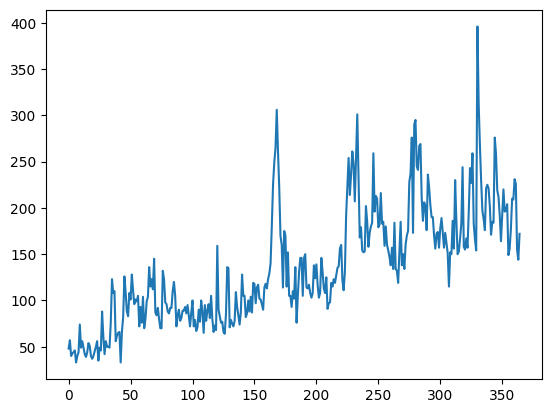

In [169]:
subs.plot()

<Axes: ylabel='lead'>

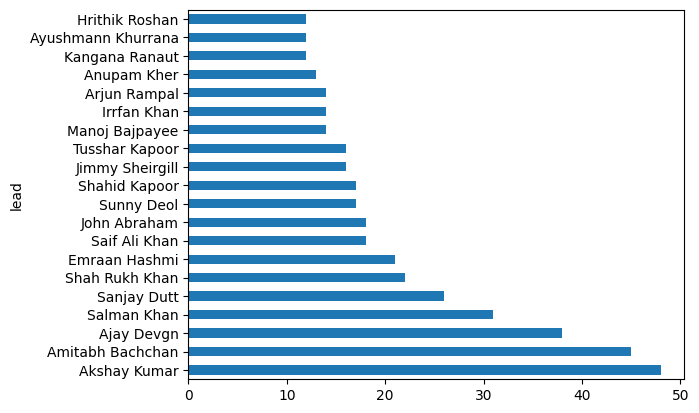

In [182]:
bollywood.value_counts().head(20).plot(kind='barh')